In [5]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupShuffleSplit


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold

from sklearn import tree

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts
import run_expts

#TS Fresh Parameter Settings
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction import extract_features

In [3]:
DecisionTreeClassifier(random_state = 5)

DecisionTreeClassifier(random_state=5)

### Settings for the experiment 

In [6]:
TS_Fresh_setting, connectivity_setting = 'Minimal' , 'beta'
data_type, expt_num = 'N1', 1 
DT_dict = {'DT' : DecisionTreeClassifier()}

### Load the data

In [7]:
# Load the features 
load_path = '/user/home/ko20929/work/RBD_using_custom_package/Data/freq_6_second_files/'
load_path_bpw = '/user/home/ko20929/work/RBD_using_custom_package/Data/freq_6_second_files/'
load_path_max_freqs = '/user/home/ko20929/work/RBD_using_custom_package/Execute New Experiments/Baseline_Extensions/Gen_New_Features/generated_feats/'

loaded_data = {}

X_y_groups = {}
    
X_bpw = pd.read_hdf(load_path_bpw + data_type +  'six_second_freq_df.h5', key='df', mode='r')
y = pd.read_hdf(load_path + data_type +  '_y.h5', key='df', mode='r') 
groups = pd.read_hdf(load_path + data_type +  '_groups.h5', key='df', mode='r')
X_bpw, y , groups = X_bpw.reset_index(drop = True) , y.reset_index(drop = True) , groups.reset_index(drop = True)

X_max_freqs = pd.read_hdf(load_path_max_freqs + data_type +  'six_second_max_freq_stats_df.h5', key='df', mode='r')
X_max_freqs = X_max_freqs.reset_index(drop = True)

X = pd.concat([X_bpw , X_max_freqs], axis = 1)

#Transform the X into TS_Fresh Features___
# 1. Convert to TS_Fresh format Dataframe 
ts_fresh_df = format_eeg_data.convert_sktime_df_to_ts_fresh_format(X, ts_cols = list(X.columns))

# 2. Extract TS_Fresh Features from the dataframe
if TS_Fresh_setting == 'Minimal':
    settings = MinimalFCParameters()

extracted_ts_fresh_df = extract_features(ts_fresh_df, column_id = 'id' , column_sort = 'time', default_fc_parameters=settings)

# 3. Asign extract_ts_fresh_df to the variable X
X = extracted_ts_fresh_df.copy()
print(len(X.columns))
#Drop columns where all values are NA 
X = X.dropna(axis = 1)
print(len(X.columns))

#Drop columns where all values are the same
# Find columns where all values are the same
same_value_columns = X.columns[X.nunique() == 1]
# Drop columns with the same values
X = X.drop(columns=same_value_columns)
print(len(X.columns))

#___________load the appropriate connectivity features don't concatenate to non connectivity features until after dictionary generation

connectivity_folder = '/user/home/ko20929/work/RBD_using_custom_package/Blue_pebble/Connectivity/'
X_connectivity = pd.read_hdf(connectivity_folder + data_type+ '_pli__df.h5')

X_connectivity = X_connectivity[[col for col in X_connectivity.columns if connectivity_setting in col]]

#Generate a region to features dictionary - this will enable us to run expts regionally as before
regional_features_dict = {}
region_channel_dict = constants.region_to_channel_dict
regions = list(region_channel_dict.keys())
for region in regions:
    region_features = [col for col in X.columns if region + '_' in col]
    if len(region_features) > 0 : 
        regional_features_dict[region] = region_features + list(X_connectivity.columns)

#Now concatenate the regional frequency features dataframe with the connectivity dataframe
X = X.reset_index(drop=True)
X_connectivity = X_connectivity.reset_index(drop=True)
X = pd.concat([X , X_connectivity], axis = 1)

11-Nov-23 20:59:42 | WARNING | Dependency not available for matrix_profile, this feature will be disabled!
Feature Extraction: 100%|██████████| 120/120 [00:03<00:00, 31.57it/s]


1950
1950
1948


In [9]:
X_full , y_full , groups_full = X.copy(), y.copy(), groups.copy()

### Load experiment data

In [ ]:
clf = DecisioTreeClassifier()
for i in 

In [45]:
clf_test = DecisionTreeClassifier(random_state = 10) 
clf_test.fit(X_expt, y_expt)


DecisionTreeClassifier(random_state=10)

In [43]:
from copy import deepcopy

copy_clf = deepcopy(clf_test)

In [44]:
copy_clf

DecisionTreeClassifier(random_state=10)

In [10]:
expt_num = 1
X_expt , y_expt , groups_expt, expt_info = run_expts.generate_expt_x_y_groups(X_full, y_full, groups_full, expt_num)

In [13]:
clf_dict = {'DT' : DecisionTreeClassifier()}

In [18]:
len(regional_features_dict['Prefrontal'])

1746

In [14]:
results_df, clfs_dict = run_expts.run_mv_tsc(X_expt,y_expt,groups_expt,clf_dict, return_df = True , subset_names_and_cols = regional_features_dict, random_states = [1,2], return_clfs = True)

In [16]:
results_df

,random_state,y_true,Prefrontal_DT_y_preds,Frontal_DT_y_preds,Left Frontal_DT_y_preds,Right Frontal_DT_y_preds,Central_DT_y_preds,Left Central_DT_y_preds,Right Central_DT_y_preds,Left Temporal_DT_y_preds,Right Temporal_DT_y_preds,Parietal_DT_y_preds,Left Parietal_DT_y_preds,Right Parietal_DT_y_preds,Occipital_DT_y_preds
0,1,"[[0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, ...","[[1, 1, 1, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, ...","[[1, 1, 0, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...","[[1, 0, 1, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...","[[1, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, ...","[[0, 0, 0, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...","[[1, 0, 1, 1, 1, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...","[[0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, ...","[[1, 0, 1, 1, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, ...","[[0, 1, 0, 1, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...","[[1, 0, 1, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...","[[0, 0, 0, 1, 0, 0, 1, 1], [0, 0, 0, 1, 1, 0, ...","[[0, 0, 1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0, ..."
1,2,"[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ...","[[1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, ..."


In [15]:
# clfs_dict

[Text(0.4, 0.8333333333333334, 'beta_FC4_FT10 <= 0.148\ngini = 0.492\nsamples = 32\nvalue = [18, 14]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.5, 'beta_FC3_T8 <= 0.33\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

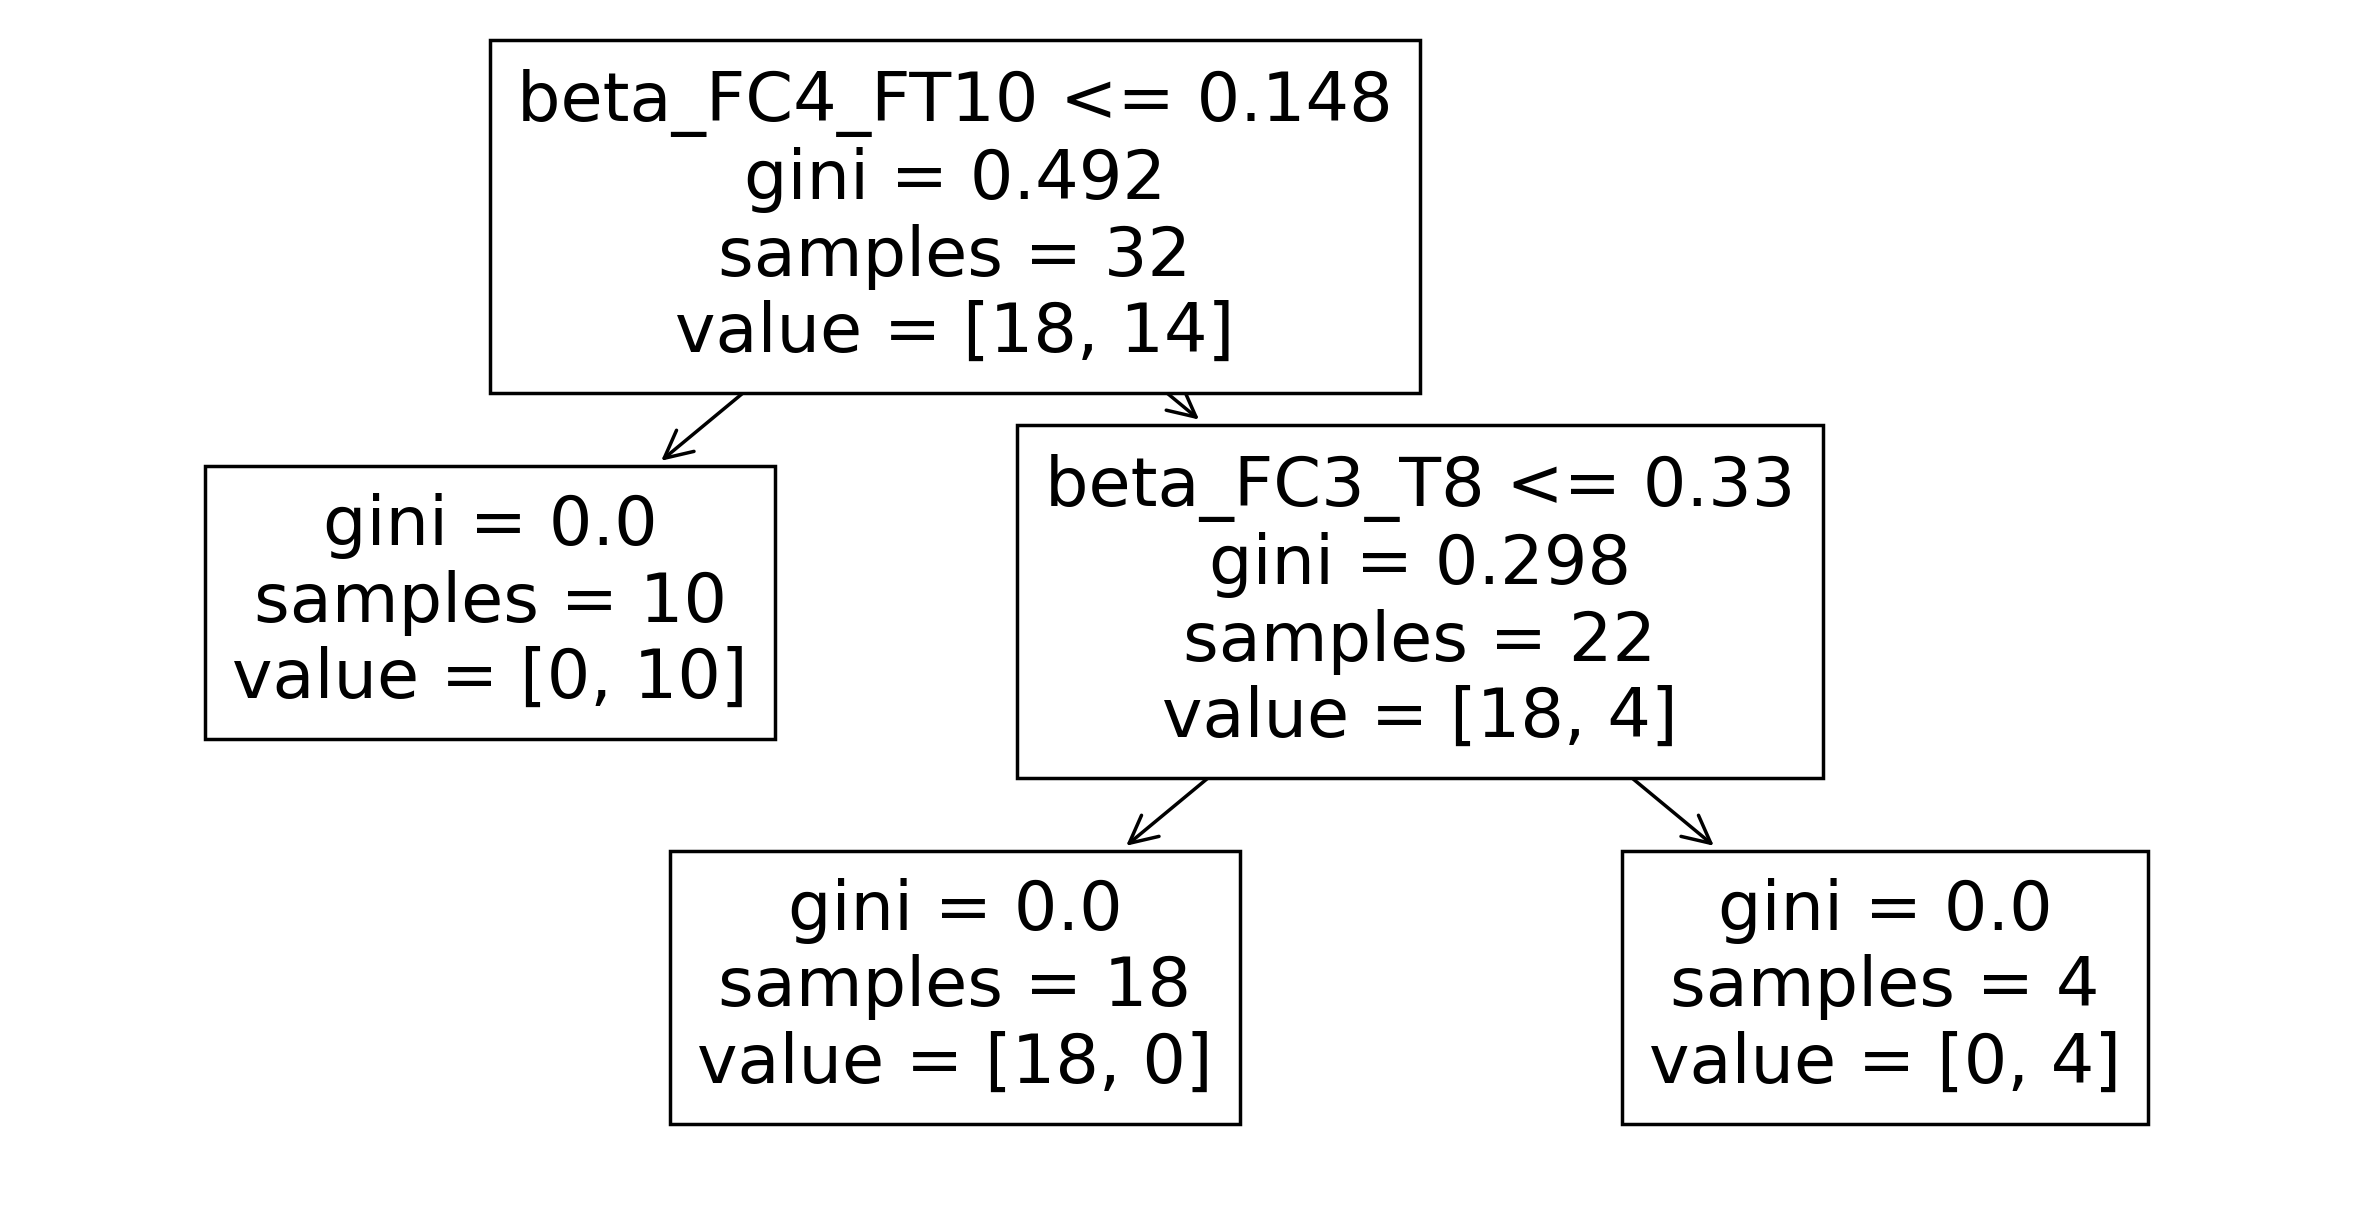

In [17]:
fig = plt.figure(figsize=(12,6),dpi=250)
tree.plot_tree(clfs_dict['Right Central_DT'][1][0], feature_names = list(X[regional_features_dict['Right Central']].columns))

In [10]:
clfs_dict['Prefrontal_DT'][0][0]

DecisionTreeClassifier()

In [129]:
X, y, groups = X_expt[ regional_features_dict['Occipital'] ] , y_expt, groups_expt 
gkf = GroupKFold(n_splits = 5)

fig = plt.figure()
fig = plt.figure(figsize=(12,6),dpi=250)

i = 1
clfs_list = []
acc_scores = []
feature_importances = []
for train_index, test_index  in gkf.split(X, y, groups = (groups.astype(int)*-1)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf = DecisionTreeClassifier(random_state = 5)
    clf = AdaBoostClassifier(random_state = 5)
    clf.fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    acc = accuracy_score(y_preds, y_test)
    clfs_list.append(clf)

    acc_scores.append(acc)
    feature_importances.append(clf.feature_importances_)
    
    # ax = fig.add_subplot(2,3,i)
    # tree.plot_tree(clf, feature_names = replace_channels_in_col_with_regions(list(X.columns)))
    # plt.title('fold ' + str(i) + ' acc: ' + str(acc))
    
    i+=1

# #Fit a tree to the entire dataset and plot it
# clf = DecisionTreeClassifier()
# clf.fit(X, y)
# y_preds = clf.predict(X)
# acc = accuracy_score(y_preds, y)

# ax = fig.add_subplot(2,3,i)
# tree.plot_tree(clf, feature_names = list(replace_channels_in_col_with_regions(list(X.columns))))
# plt.title('All data ' + ' acc: ' + str(acc))

# plt.tight_layout()
# plt.savefig('explanation_figs/test_fig.png')
# plt.show()
print( str(np.array(acc_scores).mean()) )



0.9


<Figure size 2000x1000 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

In [144]:
if True and not True :
    print('lel')
else: 
    print('phlel')

phlel


In [145]:
False and True 

False

In [140]:
joblib.dump(clfs_list , 'clfs_list.pkl')

['clfs_list.pkl']

In [136]:
clfs_list_loaded = joblib.load('clfs_list.pkl')

In [130]:
acc_scores

[1.0, 1.0, 0.875, 0.75, 0.875]

In [104]:
feature_importances_arr = np.array(feature_importances)
mean_importances = feature_importances_arr.mean(axis = 0)
mean_importances

array([0., 0., 0., ..., 0., 0., 0.])

In [108]:
X.columns

Index(['Delta_Occipital__sum_values', 'Delta_Occipital__median',
       'Delta_Occipital__mean', 'Delta_Occipital__length',
       'Delta_Occipital__standard_deviation', 'Delta_Occipital__variance',
       'Delta_Occipital__root_mean_square', 'Delta_Occipital__maximum',
       'Delta_Occipital__absolute_maximum', 'Delta_Occipital__minimum',
       ...
       'beta_PO8_POz', 'beta_PO8_O1', 'beta_PO8_O2', 'beta_PO8_Oz',
       'beta_POz_O1', 'beta_POz_O2', 'beta_POz_Oz', 'beta_O1_O2', 'beta_O1_Oz',
       'beta_O2_Oz'],
      dtype='object', length=1746)

In [110]:
sorted_idx = mean_importances.argsort()

In [118]:
mean_importances[sorted_idx][-30:]

array([0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.016,
       0.016, 0.016, 0.02 , 0.024, 0.028, 0.028, 0.032, 0.04 , 0.056,
       0.084, 0.092, 0.32 ])

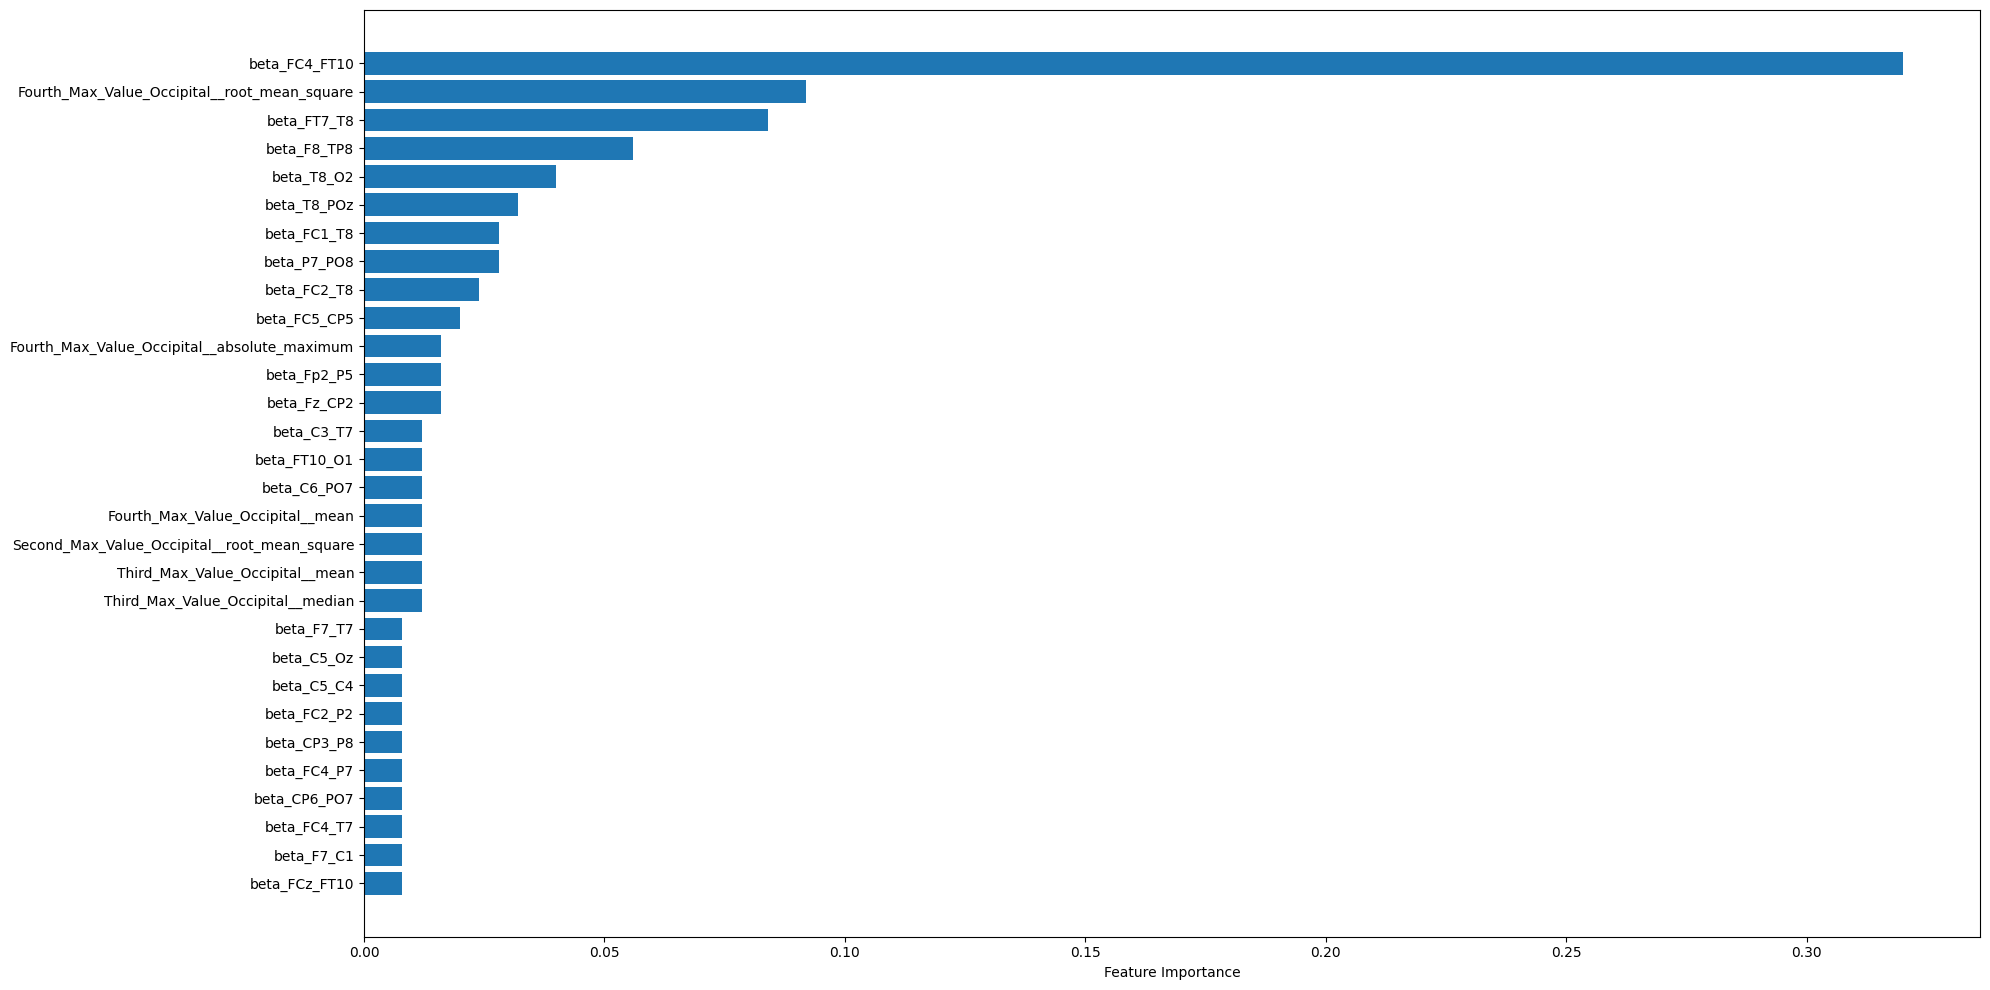

In [132]:
sorted_idx = mean_importances.argsort()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,10)
plt.barh(X_train.columns[sorted_idx][-30:] , mean_importances[sorted_idx][-30:])
plt.xlabel("Feature Importance")
plt.tight_layout()

In [102]:
arr = clf.feature_importances_
# Find the indices of non-zero elements
nonzero_indices = np.nonzero(arr)
# Extract the non-zero elements
nonzero_elements = arr[nonzero_indices]
features = [list(X.columns)[i] for i in list(nonzero_indices[0])]
features

['Second_Max_Value_Occipital__mean',
 'Second_Max_Value_Occipital__root_mean_square',
 'Third_Max_Value_Occipital__mean',
 'Fourth_Max_Value_Occipital__mean',
 'Fourth_Max_Value_Occipital__root_mean_square',
 'beta_Fp2_F7',
 'beta_Fp2_P5',
 'beta_FCz_FT10',
 'beta_FC1_T8',
 'beta_FC2_T8',
 'beta_FC5_CP5',
 'beta_FC4_FT10',
 'beta_CP6_PO7',
 'beta_FT7_T8',
 'beta_T8_O2',
 'beta_P3_PO8',
 'beta_P7_PO8']

#### Plot tree

In [14]:
region_to_channel_dict = constants.region_to_channel_dict

def get_key_by_item(target_item, dictionary= region_to_channel_dict):
    #Function to return region when a channel is given
    for key, items in dictionary.items():
        if target_item in items:
            return key

channel_list = constants.channel_list

channel_to_region_dict = {}
for channel in channel_list:
    channel_to_region_dict[channel] = get_key_by_item(channel)

#channel_to_region_dict sorted for replacement
channel_to_region_dict_sorted = sorted(channel_to_region_dict.items(), key=lambda x: len(x[0]), reverse=True)

def replace_channels_in_col_with_regions(column_names, replacements = channel_to_region_dict_sorted):
    new_column_names = []
    for name in column_names:
        for old_value, new_value in replacements:
            name = name.replace(old_value, new_value)
        new_column_names.append(name)
    return new_column_names

[Text(0.4, 0.8333333333333334, 'beta_FC4_FT10 <= 0.148\ngini = 0.469\nsamples = 40\nvalue = [25, 15]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6, 0.5, 'beta_Cz_FC3 <= 0.334\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

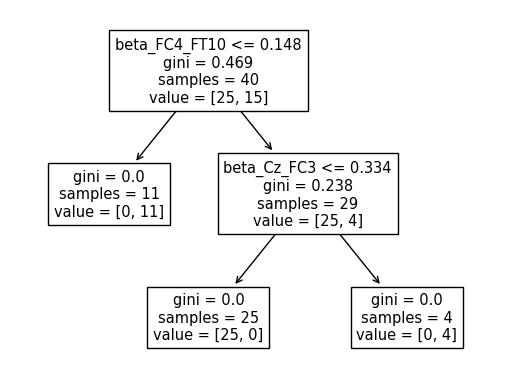

In [16]:
clf2 = DecisionTreeClassifier()
clf2.fit(X, y)
tree.plot_tree(clf2, feature_names = list(X.columns))